In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

train_df = pd.read_csv('train.csv')
train_df.dropna(inplace=True)
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [143]:
planets = ['Earth', 'Europa']
spendings = ['RoomService','Spa','VRDeck','FoodCourt','ShoppingMall']
cabins = train_df.Cabin
destinations = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
X = train_df[['Age','VIP']].copy()
X['VIP'] = np.where(train_df['VIP'] == True, 1, 0)
X['Spendings'] = train_df[spendings].sum(axis=1)
for c in destinations:
        X[c] = np.where(train_df.Destination == c,1, 0)
for c in planets:
    X[c] = np.where(train_df.HomePlanet == c, 1, 0)
X['CryoSleep'] = np.where(train_df.CryoSleep == True, 1, 0)
X['CabDeck'] = train_df['Cabin'].str[0]
X.CabDeck = [ ord(x) - 64 for x in X.CabDeck ]
X['CabSide'] = train_df['Cabin'].str[-1]
X.CabSide = [ ord(x)%2 for x in X.CabSide ]
X['CabNum'] = train_df['Cabin'].str[2:-2]
y = train_df['Transported']
print(X)

       Age  VIP  Spendings  TRAPPIST-1e  55 Cancri e  PSO J318.5-22  Earth  \
0     39.0    0        0.0            1            0              0      0   
1     24.0    0      736.0            1            0              0      1   
2     58.0    1    10383.0            1            0              0      0   
3     33.0    0     5176.0            1            0              0      0   
4     16.0    0     1091.0            1            0              0      1   
...    ...  ...        ...          ...          ...            ...    ...   
8688  41.0    1     8536.0            0            1              0      0   
8689  18.0    0        0.0            0            0              1      1   
8690  26.0    0     1873.0            1            0              0      1   
8691  32.0    0     4637.0            0            1              0      0   
8692  44.0    0     4826.0            1            0              0      0   

      Europa  CryoSleep  CabDeck  CabSide CabNum  
0          1

In [144]:
correlation_df = X.copy()
correlation_df['Transported'] = train_df.Transported
correlation_df = correlation_df.corr()
correlation_df

,Age,VIP,Spendings,TRAPPIST-1e,55 Cancri e,PSO J318.5-22,Earth,Europa,CryoSleep,CabDeck,CabSide,Transported
Age,1.000000,0.098138,0.196001,-0.001289,0.018652,-0.024093,-0.211611,0.227537,-0.085701,-0.254741,0.006239,-0.082553
VIP,0.098138,1.000000,0.165895,-0.038647,0.044215,-0.000931,-0.171725,0.155231,-0.082303,-0.194518,-0.009847,-0.042260
Spendings,0.196001,0.165895,1.000000,-0.056403,0.135588,-0.100903,-0.305021,0.416565,-0.386646,-0.397018,0.009760,-0.190992
TRAPPIST-1e,-0.001289,-0.038647,-0.056403,1.000000,-0.781056,-0.484484,-0.015918,-0.155341,-0.115603,0.105482,-0.001374,-0.110655
55 Cancri e,0.018652,0.044215,0.135588,-0.781056,1.000000,-0.167869,-0.153941,0.294744,0.063681,-0.262201,0.006326,0.123783
PSO J318.5-22,-0.024093,-0.000931,-0.100903,-0.484484,-0.167869,1.000000,0.240784,-0.167674,0.093287,0.200795,-0.006694,0.001281
Earth,-0.211611,-0.171725,-0.305021,-0.015918,-0.153941,0.240784,1.000000,-0.630734,-0.107303,0.707560,-0.015596,-0.168845
Europa,0.227537,0.155231,0.416565,-0.155341,0.294744,-0.167674,-0.630734,1.000000,0.097172,-0.860631,0.046553,0.182004
CryoSleep,-0.085701,-0.082303,-0.386646,-0.115603,0.063681,0.093287,-0.107303,0.097172,1.000000,0.024420,0.015949,0.462803
CabDeck,-0.254741,-0.194518,-0.397018,0.105482,-0.262201,0.200795,0.707560,-0.860631,0.024420,1.000000,-0.040787,-0.111510


<AxesSubplot:>

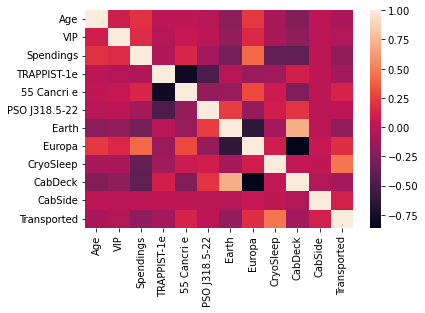

In [145]:
sns.heatmap(correlation_df)

In [146]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [147]:
sgd_model = make_pipeline(StandardScaler(), SGDClassifier(random_state=5))
sgd_model.fit(train_X, train_y)
sgd_predictions = sgd_model.predict(val_X)
preds = pd.DataFrame()
preds['Predictions'] = sgd_predictions
preds['Values'] = np.array(val_y)
preds.tail(20)

,Predictions,Values
1632,False,False
1633,False,True
1634,False,True
1635,True,True
1636,False,True
1637,False,False
1638,False,False
1639,True,True
1640,False,True
1641,True,True


In [148]:
error_df = pd.DataFrame({'Value': val_y, 'Prediction': sgd_predictions})
error_df.head()

,Value,Prediction
5606,False,False
8226,False,False
1288,False,True
3220,True,False
4596,False,False


In [149]:
error_df.describe()

,Value,Prediction
count,1652,1652
unique,2,2
top,True,False
freq,840,908


In [150]:
error_df.corr()

,Value,Prediction
Value,1.000000,0.427585
Prediction,0.427585,1.000000


In [151]:
test_df = pd.read_csv('test.csv')

test_X = test_df[['Age','VIP']].copy()
test_X['VIP'] = np.where(test_df['VIP'] == True, 1, 0)
test_X['Age'].fillna(30, inplace=True)
test_X['Spendings'] = test_df[spendings].sum(axis=1)
test_X['Spendings'].fillna(0, inplace = True)
for c in destinations:
        test_X[c] = np.where(test_df.Destination == c,1, 0)
for c in planets:
    test_X[c] = np.where(test_df.HomePlanet == c, 1, 0)
test_X['CryoSleep'] = np.where(test_df.CryoSleep == True, 1, 0)
test_X['CabDeck'] = test_df['Cabin'].str[0]
test_X['CabDeck'].fillna(random.choice(string.ascii_letters), inplace=True)
test_X.CabDeck = [ ord(x) - 64 for x in test_X.CabDeck ]
test_X['CabSide'] = test_df['Cabin'].str[-1]
test_X['CabSide'].fillna(random.choice(['S','P']), inplace=True)
test_X.CabSide = [ ord(x)%2 for x in test_X.CabSide ]
test_X['CabNum'] = test_df['Cabin'].str[2:-2]
test_X['CabNum'].fillna(random.randint(0, 1000), inplace=True)
print(test_X)

       Age  VIP  Spendings  TRAPPIST-1e  55 Cancri e  PSO J318.5-22  Earth  \
0     27.0    0        0.0            1            0              0      1   
1     19.0    0     2832.0            1            0              0      1   
2     31.0    0        0.0            0            1              0      0   
3     38.0    0     7418.0            1            0              0      0   
4     20.0    0      645.0            1            0              0      1   
...    ...  ...        ...          ...          ...            ...    ...   
4272  34.0    0        0.0            1            0              0      1   
4273  42.0    0     1018.0            1            0              0      1   
4274  30.0    0        0.0            0            1              0      0   
4275  30.0    0     3203.0            0            0              0      0   
4276  43.0    0        0.0            0            0              1      1   

      Europa  CryoSleep  CabDeck  CabSide CabNum  
0          0

In [152]:
sgd_model.fit(X,y)
test_predictions = sgd_model.predict(test_X)
print("Predictions are: " + str(list(test_predictions[:10])))

Predictions are: [True, False, True, False, False, False, True, True, True, False]


In [153]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId,
                       'Transported': test_predictions})
output.to_csv('titanic_submission.csv', index=False)

In [154]:
output.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,2
top,0013_01,False
freq,1,2541
